## Diabet Machin Learning Project
# 1404 - 1

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
data = pd.read_csv('diabetes.csv')
print(data.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [9]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
data.shape

(768, 9)

Text(0.5, 1.0, 'Diabetes Outcome Distribution')

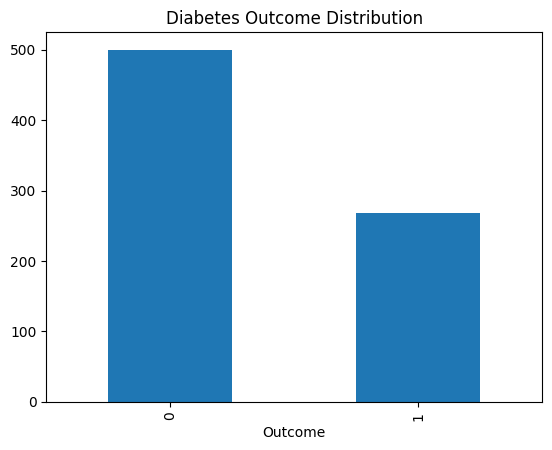

In [11]:
data['Outcome'].value_counts().plot(kind='bar')
plt.title('Diabetes Outcome Distribution')

In [12]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [13]:
x = np.array(x)
y = np.array(y)

In [14]:
# normalize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x = scaler.fit_transform(x)


In [15]:
# split the data into training and testing sets
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,
                                                    test_size=0.2, 
                                                    random_state=7)


In [17]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((614, 8), (154, 8), (614,), (154,))

In [18]:
# import models

from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train, y_train)


,priors,None
,var_smoothing,1e-09


In [27]:
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)


In [28]:
# Evaluation
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

train_accuracy = accuracy_score(y_train, y_pred_train)
test_accuracy = accuracy_score(y_test, y_pred_test)
print(f'Training Accuracy: {train_accuracy}')
print(f'Testing Accuracy: {test_accuracy}')


Training Accuracy: 0.760586319218241
Testing Accuracy: 0.7532467532467533


In [29]:
# confusion matrix
cm = confusion_matrix(y_test, y_pred_test)
print('Confusion Matrix:')
print(cm)

# classification report
cr = classification_report(y_test, y_pred_test)
print('Classification Report:')
print(cr)


Confusion Matrix:
[[78 19]
 [19 38]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        97
           1       0.67      0.67      0.67        57

    accuracy                           0.75       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.75      0.75      0.75       154



<Axes: >

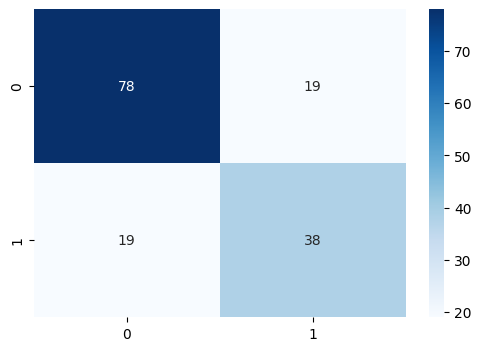

In [23]:
# plot confusion matrix
import seaborn as sns
plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')


In [32]:
# save the model

import joblib
joblib.dump(model, 'diabetes_model.pkl')
joblib.dump(scaler, 'scaler.pkl')


['scaler.pkl']

In [ ]:
import joblib
loaded_model = joblib.load('diabetes_model.pkl')
loaded_scaler = joblib.load('scaler.pkl')

# Example prediction
sample_data = np.array([[6,148,72,35,0,33.6,0.627,50]])
sample_data_scaled = loaded_scaler.transform(sample_data)
prediction = loaded_model.predict(sample_data_scaled)
print(f'Predicted Outcome: {prediction[0]}')  # 0: No Diabetes, 1: Diabetes

Predicted Outcome: 1
